In [3]:

import pandas as pd, numpy as np, os, re

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
src_path = "/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_estimation_original.csv"

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,-0.526613,-0.887408,-0.872985,-0.788364,0.390906,-0.007810,-1.186977,0.554211,False,True,...,False,False,True,False,True,False,False,False,False,False
1,-0.526613,-1.960788,-1.178508,1.082164,0.390906,1.636552,2.328908,-1.090505,False,True,...,False,False,True,False,True,False,False,False,False,False
2,-0.212507,1.044677,-0.376509,-0.788364,0.390906,-0.007810,1.156947,0.554211,True,True,...,False,False,True,False,True,False,False,False,False,False
3,0.415705,1.044677,0.005395,1.082164,0.390906,-0.007810,1.156947,-1.090505,True,False,...,False,False,False,True,False,False,False,False,True,False
4,-0.369560,0.830001,0.112328,-0.788364,-2.225418,-0.007810,-1.186977,-1.090505,True,False,...,False,False,True,False,False,False,False,False,False,True
5,0.729811,-0.887408,-1.293079,-0.788364,0.390906,-0.007810,-1.186977,-1.090505,True,False,...,False,False,False,False,True,False,False,False,False,False
6,-0.212507,-2.175464,-1.216699,1.082164,0.390906,-0.007810,-0.015015,-1.090505,False,True,...,False,True,False,False,True,False,False,False,False,False
7,-0.369560,-0.672732,-1.293079,-0.788364,0.390906,-0.007810,2.328908,-1.090505,True,False,...,False,False,True,False,True,False,False,False,False,False
8,-0.055454,0.830001,-0.872985,1.082164,0.390906,-0.007810,-0.015015,0.554211,True,True,...,False,False,True,False,True,False,False,False,False,False
9,-0.369560,0.185973,-0.720223,-0.788364,0.390906,-0.007810,-0.015015,0.554211,True,True,...,False,False,True,False,True,False,False,False,False,False


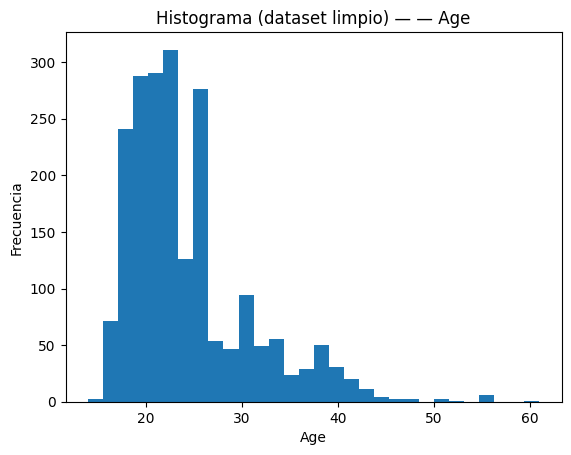

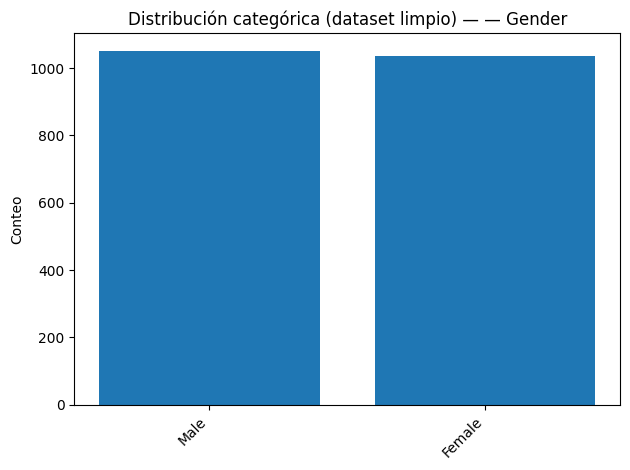

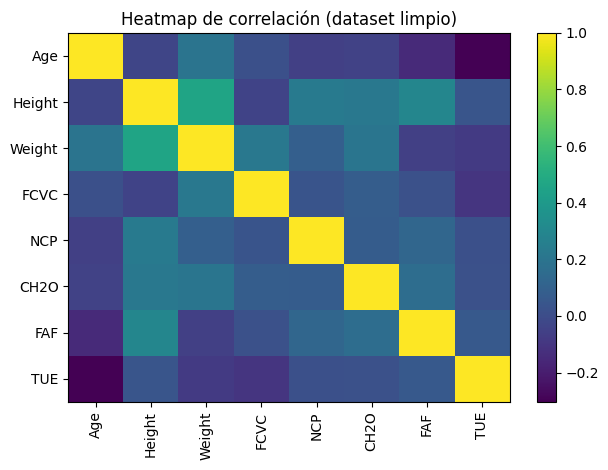

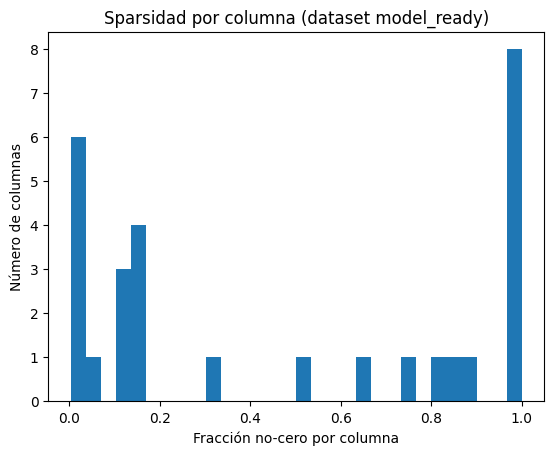

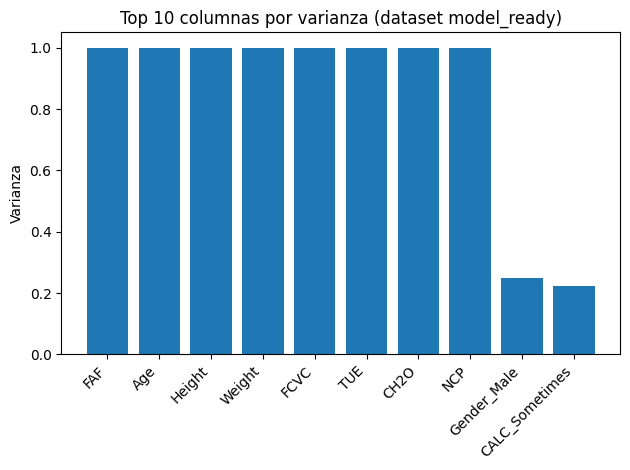

Listo: visualizaciones generadas y datasets guardados en:
/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_clean_raw.csv
/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_model_ready.csv


In [9]:
# Re-crear datasets limpio y model_ready desde el original, y visualizar ambos.
# (Usa matplotlib sin estilos/colores específicos y una gráfica por figura.)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# ---------- Cargar dataset original ----------
df_raw = pd.read_csv(src_path, sep=None, engine="python", encoding="utf-8")

# ---------- Limpieza básica ----------
df = df_raw.copy()
# Estandarizar nulos y espacios
df = df.replace(r"^\s*$", np.nan, regex=True)
df = df.replace({"NA": np.nan, "N/A": np.nan, "na": np.nan, "NaN": np.nan})

# Recortar strings
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
for c in obj_cols:
    df[c] = df[c].astype(str).str.strip()

# Duplicados y columnas 100% nulas
df = df.drop_duplicates()
all_null = [c for c in df.columns if df[c].isna().all()]
if all_null:
    df = df.drop(columns=all_null)

# Imputación simple
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

for c in num_cols:
    med = df[c].median()
    df[c] = df[c].fillna(med)

for c in cat_cols:
    mode = df[c].mode(dropna=True)
    df[c] = df[c].fillna(mode.iloc[0] if len(mode) else "UNKNOWN")

# Guardar dataset limpio
clean_path = "/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_clean_raw.csv"
df.to_csv(clean_path, index=False)

# ---------- Preparación para modelado ----------
df_model = pd.get_dummies(df, columns=cat_cols, drop_first=True)
scaler = StandardScaler()
if num_cols:
    df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

model_path = "/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_model_ready.csv"
df_model.to_csv(model_path, index=False)

# ---------- Vistas previas ----------
display(df.head(20))
display(df_model.head(20))

# ---------- Visualizaciones ----------

# 1) Histograma de una columna numérica representativa (dataset limpio)
num_cols_clean = df.select_dtypes(include=[np.number]).columns.tolist()
if num_cols_clean:
    col_num = num_cols_clean[0]
    plt.figure()
    plt.hist(df[col_num].dropna().astype(float), bins=30)
    plt.xlabel(col_num)
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma (dataset limpio) — — {col_num}")
    plt.show()

# 2) Barras de una columna categórica representativa (dataset limpio)
cat_cols_clean = [c for c in df.columns if c not in num_cols_clean]
if cat_cols_clean:
    col_cat = cat_cols_clean[0]
    vc = df[col_cat].astype(str).value_counts().head(12)
    plt.figure()
    plt.bar(vc.index.astype(str), vc.values)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Conteo")
    plt.title(f"Distribución categórica (dataset limpio) — — {col_cat}")
    plt.tight_layout()
    plt.show()

# 3) Heatmap de correlaciones numéricas (dataset limpio), si hay suficientes columnas
num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols_all) >= 2:
    corr = df[num_cols_all].corr(numeric_only=True)
    plt.figure()
    plt.imshow(corr, aspect="auto")
    plt.colorbar()
    plt.xticks(range(len(num_cols_all)), num_cols_all, rotation=90)
    plt.yticks(range(len(num_cols_all)), num_cols_all)
    plt.title("Heatmap de correlación (dataset limpio)")
    plt.tight_layout()
    plt.show()

# 4) Sparsidad por columna (dataset model_ready)
non_zero_frac = (df_model != 0).sum(axis=0) / max(1, len(df_model))
plt.figure()
plt.hist(non_zero_frac.values, bins=30)
plt.xlabel("Fracción no-cero por columna")
plt.ylabel("Número de columnas")
plt.title("Sparsidad por columna (dataset model_ready)")
plt.show()

# 5) Top 10 columnas por varianza (dataset model_ready)
variances = df_model.var(numeric_only=True).sort_values(ascending=False).head(10)
if len(variances) > 0:
    plt.figure()
    plt.bar(variances.index.astype(str), variances.values)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Varianza")
    plt.title("Top 10 columnas por varianza (dataset model_ready)")
    plt.tight_layout()
    plt.show()

print("Listo: visualizaciones generadas y datasets guardados en:")
print(clean_path)
print(model_path)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.000000,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.000000,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.000000,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.000000,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.789868,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.000000,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.000000,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.000000,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.000000,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.000000,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


,column,cardinality
8,NObeyesdad,7
7,MTRANS,5
3,CAEC,4
6,CALC,4
0,Gender,2
4,SMOKE,2
2,FAVC,2
1,family_history_with_overweight,2
5,SCC,2


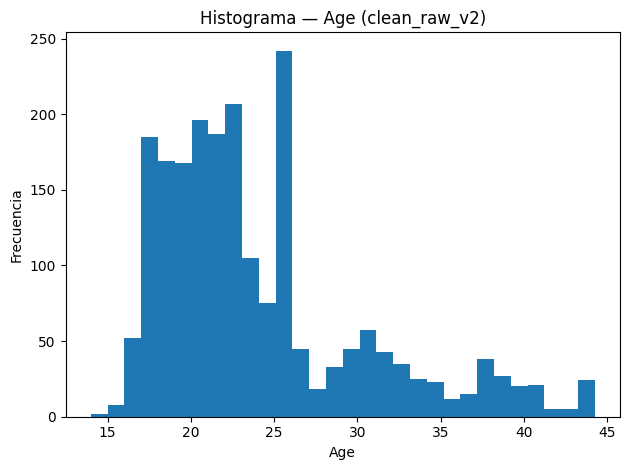

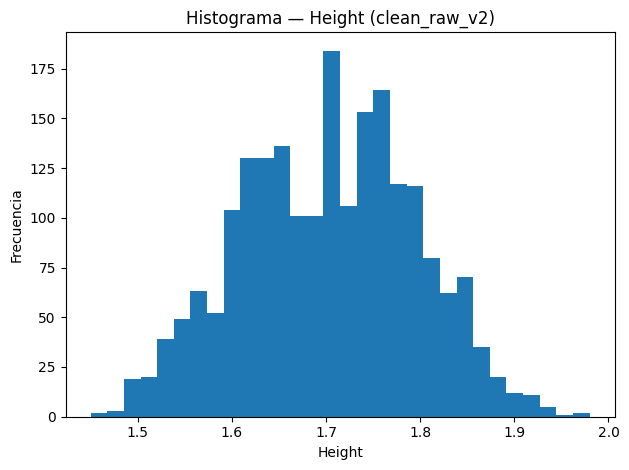

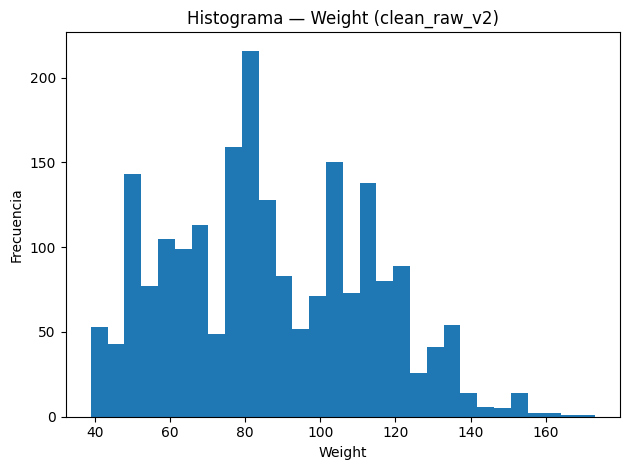

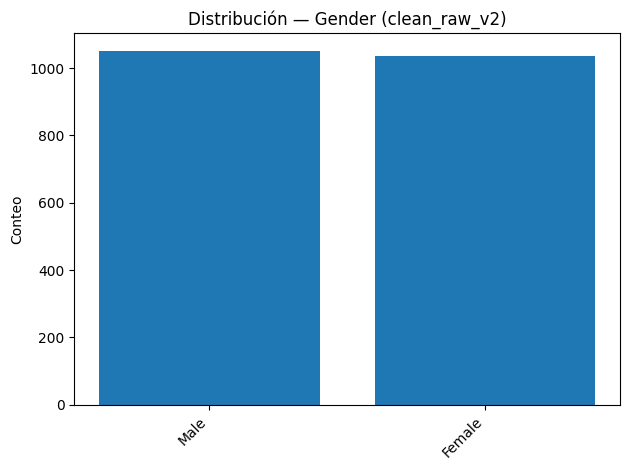

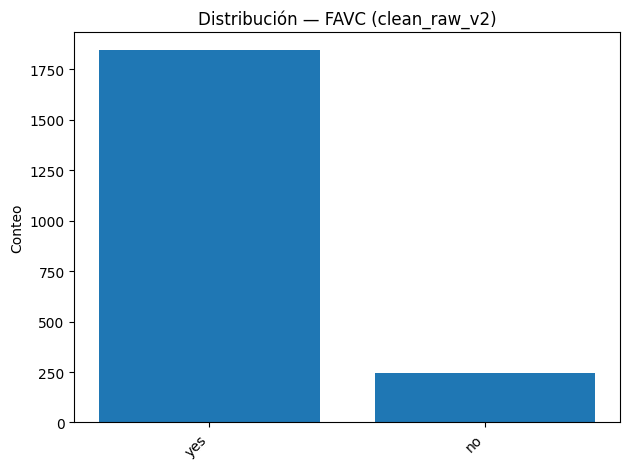

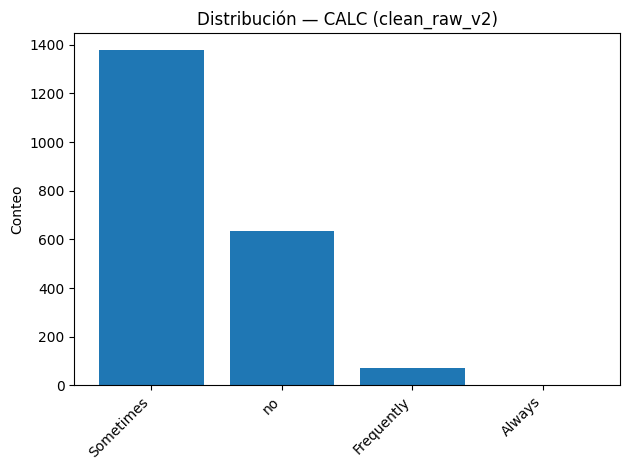

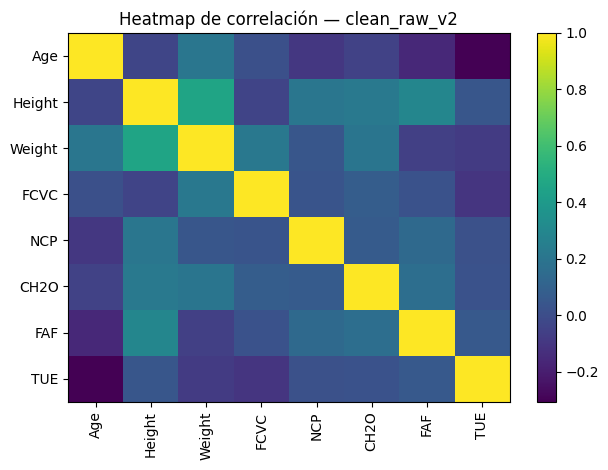

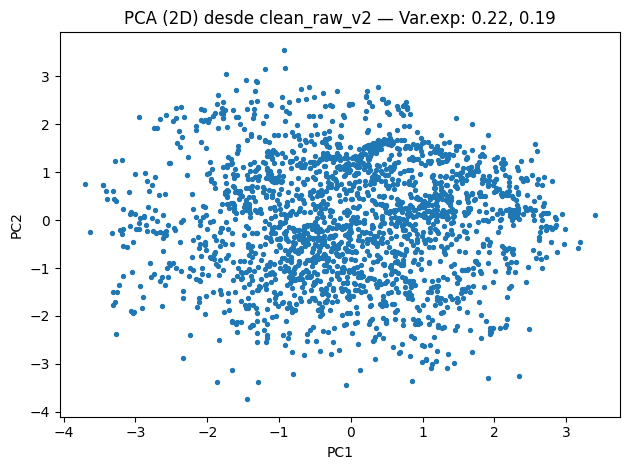

('/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_clean_raw_v2.csv',
 '/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_eda_summary_v2.csv',
 '/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_model_ready_from_clean.csv',
 '/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_pca_from_clean.csv',
 '/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_clean_report_v2.docx')

In [14]:
# Pipeline sobre el *clean raw*: limpieza adicional, EDA (visual + estadísticas), preprocesamiento
# (normalización, codificación) y reducción de dimensionalidad (PCA).
#
# Entradas:
#   /mnt/data/obesity_clean_raw.csv   (generado previamente)
#
# Salidas:
#   /mnt/data/obesity_clean_raw_v2.csv
#   /mnt/data/obesity_eda_summary_v2.csv
#   /mnt/data/obesity_model_ready_from_clean.csv
#   /mnt/data/obesity_pca_from_clean.csv
#   /mnt/data/obesity_clean_report_v2.docx
#
# Además, se muestran vistas previas y gráficas (matplotlib, una por figura, sin colores específicos).

import os, re, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from docx import Document
from docx.shared import Pt, Inches


# --------------------
# 1) Carga
# --------------------
src = "/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_clean_raw.csv"
df = pd.read_csv(src)

# --------------------
# 2) Limpieza adicional
# --------------------
rows0 = len(df)

# 2.1 Normalizar tipos: convierte a numéricos columnas objeto que lucen numéricas
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
for c in obj_cols:
    # Si >80% de valores son numéricos parsables, convertir
    parsable = pd.to_numeric(df[c], errors="coerce")
    rate = parsable.notna().mean()
    if rate >= 0.8:
        df[c] = parsable

# Recalcular tipos
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

# 2.2 Eliminar duplicados exactos
dup_before = int(df.duplicated().sum())
df = df.drop_duplicates()

# 2.3 Manejo de outliers: winsorization por IQR*3 (cap) para no perder filas
def iqr_bounds(s, k=3.0):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return (q1 - k*iqr, q3 + k*iqr)

bounds = {}
for c in num_cols:
    if df[c].notna().sum() >= 10:
        lo, hi = iqr_bounds(df[c].astype(float), 3.0)
        bounds[c] = (float(lo), float(hi))
        df[c] = df[c].clip(lower=lo, upper=hi)

# 2.4 Imputación final (por si quedaron NaN tras conversiones)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

impute_map = {}
for c in num_cols:
    med = df[c].median()
    df[c] = df[c].fillna(med)
    impute_map[c] = ("median", float(med) if pd.notna(med) else None)

for c in cat_cols:
    m = df[c].mode(dropna=True)
    mv = m.iloc[0] if len(m) else "UNKNOWN"
    df[c] = df[c].fillna(mv)
    impute_map[c] = ("mode", str(mv))

rows1 = len(df)

# Guardar versión v2 del clean raw
clean_v2 = "/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_clean_raw_v2.csv"
df.to_csv(clean_v2, index=False)

# --------------------
# 3) EDA — estadísticas & visuales
# --------------------
# Vista previa
display(df.head(15))

# Estadísticas numéricas
eda_num = df.select_dtypes(include=[np.number]).describe().T
eda_num["missing_pct"] = df[num_cols].isna().mean().values if num_cols else []
eda_num_path = "/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_eda_summary_v2.csv"
eda_num.to_csv(eda_num_path)

# Cardinalidad categóricas
cat_card = pd.DataFrame({
    "column": cat_cols,
    "cardinality": [df[c].nunique(dropna=True) for c in cat_cols]
}).sort_values("cardinality", ascending=False)

display(cat_card)

# Visualizaciones — seleccionar algunas columnas representativas
num_for_hist = [c for c in ["Age","Height","Weight","BMI"] if c in df.columns]
num_for_hist = num_for_hist[:3] if len(num_for_hist) >= 3 else (df.select_dtypes(include=[np.number]).columns.tolist()[:3])

for c in num_for_hist:
    plt.figure()
    plt.hist(df[c].dropna().astype(float), bins=30)
    plt.xlabel(c); plt.ylabel("Frecuencia")
    plt.title(f"Histograma — {c} (clean_raw_v2)")
    plt.tight_layout()
    plt.show()

cat_for_bar = [c for c in ["Gender","FAVC","CALC","SMOKE","MTRANS","SCC","CAEC"] if c in df.columns]
if not cat_for_bar:
    cat_for_bar = cat_cols[:3]
for c in cat_for_bar[:3]:
    vc = df[c].astype(str).value_counts().head(12)
    plt.figure()
    plt.bar(vc.index.astype(str), vc.values)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Conteo")
    plt.title(f"Distribución — {c} (clean_raw_v2)")
    plt.tight_layout()
    plt.show()

# Mapa de calor de correlaciones numéricas (si hay >=2)
num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols_all) >= 2:
    corr = df[num_cols_all].corr(numeric_only=True)
    plt.figure()
    plt.imshow(corr, aspect="auto")
    plt.colorbar()
    plt.xticks(range(len(num_cols_all)), num_cols_all, rotation=90)
    plt.yticks(range(len(num_cols_all)), num_cols_all)
    plt.title("Heatmap de correlación — clean_raw_v2")
    plt.tight_layout()
    plt.show()

# --------------------
# 4) Preprocesamiento + PCA
# --------------------
df_model = df.copy()

# One-hot en categóricas
df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# Normalización z-score en numéricos originales
scaler = StandardScaler()
num_cols_model = [c for c in num_cols if c in df_model.columns]
if num_cols_model:
    df_model[num_cols_model] = scaler.fit_transform(df_model[num_cols_model])

model_ready_from_clean = "/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_model_ready_from_clean.csv"
df_model.to_csv(model_ready_from_clean, index=False)

# PCA
X = df_model.select_dtypes(include=[np.number]).values
pca = PCA(n_components=2, random_state=0)
Z = pca.fit_transform(X)
pca_df = pd.DataFrame(Z, columns=["PC1","PC2"])
pca_path = "/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_pca_from_clean.csv"
pca_df.to_csv(pca_path, index=False)

plt.figure()
plt.scatter(pca_df["PC1"], pca_df["PC2"], s=8)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"PCA (2D) desde clean_raw_v2 — Var.exp: {pca.explained_variance_ratio_[0]:.2f}, {pca.explained_variance_ratio_[1]:.2f}")
plt.tight_layout()
plt.show()

# --------------------
# 5) Reporte Word
# --------------------
doc = Document()
title = doc.add_paragraph()
r = title.add_run("EDA + Preprocesamiento desde clean_raw_v2 — Obesity Dataset")
r.bold = True; r.font.size = Pt(16)

def h(txt):
    p = doc.add_paragraph()
    rr = p.add_run(txt); rr.bold = True; rr.font.size = Pt(12)

def bullet(txt):
    p = doc.add_paragraph("• " + txt)

h("Limpieza aplicada")
bullet(f"Duplicados eliminados: {dup_before}")
bullet("Outliers cap (IQR*3) aplicado a columnas numéricas (winsorization).")
bullet("Imputación final: mediana (numéricos) y moda (categóricas).")

h("EDA")
bullet(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}")
bullet(f"Numéricas: {len(num_cols_all)} | Categóricas: {len(cat_cols)}")
bullet(f"Resumen numérico exportado a: {os.path.basename(eda_num_path)}")

h("Preprocesamiento")
bullet(f"One-hot encoding: {len([c for c in df_model.columns if c not in num_cols_model]) - (df.shape[1]-len(num_cols))} columnas creadas")
bullet(f"Normalización z-score aplicada a {len(num_cols_model)} columnas numéricas")
bullet(f"Dataset para modelado: {os.path.basename(model_ready_from_clean)}")

h("Reducción de dimensionalidad")
bullet(f"PCA 2D exportado a: {os.path.basename(pca_path)}")
bullet(f"Varianza explicada: {pca.explained_variance_ratio_[0]:.2f}, {pca.explained_variance_ratio_[1]:.2f}")

report_docx = "/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/obesity_clean_report_v2.docx"
doc.save(report_docx)

(clean_v2, eda_num_path, model_ready_from_clean, pca_path, report_docx)